In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


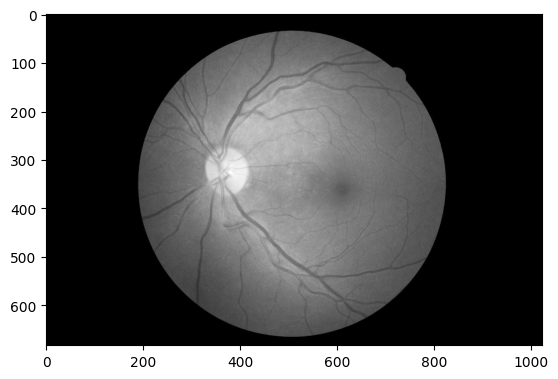

In [2]:
DATADIR = os.path.join(r"C:\Users\maxwe\OneDrive\Desktop\Machine learning files for the methodology and source code\Image")
categories = ["0", "1", "2", "3", "4"]

for Diagnose in categories:
    path = os.path.join(DATADIR, Diagnose)  # path to diabetic retinopathy directory
    for img in os.listdir(path):
        diagnose_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(diagnose_array, cmap="gray")  # grayscale all the images within the dataset
        plt.show()
        break
    break  # This break will only iterate through the first category, remove if not intended

In [3]:
print(diagnose_array.shape) #print the size of the images 

(683, 1024)


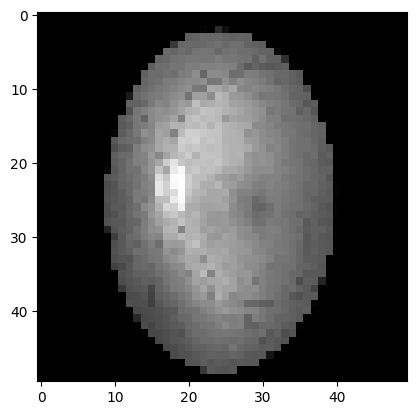

In [4]:
Image_Size=50
resize_array = cv2.resize(diagnose_array, (Image_Size, Image_Size))
plt.imshow(resize_array, cmap='gray')  # resize the images by 50x50
plt.show() 

In [5]:


Image_Size = 50
training_model = []

def create_training_model(categories, DATADIR):
    for diagnose in categories:
        if diagnose not in ["0", "1"]:
            continue
            
        # Path to the directory containing images for the current diagnose
        path = os.path.join(DATADIR, diagnose)
        
        
        class_category = categories.index(diagnose)
        
        # Iterate over each image in the directory
        for img in os.listdir(path):
            try:
                # Read the image in grayscale
                diagnose_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Resize the image array
                resize_array = cv2.resize(diagnose_array, (Image_Size, Image_Size))
                
                # Append the resized image array and its class category to the training model
                training_model.append([resize_array, class_category])
            
            except Exception as e:
                pass

# Creating training model and resizing images that in category 0 and 1
create_training_model(categories, DATADIR)


In [6]:
print(len(training_model)) #print the number of images within the training model

28253


In [7]:
import random 
random.shuffle(training_model) # randomize the images from the training model 

In [8]:
for testing_data in training_model[:100]:
    print(testing_data[1]) #print the first 100 images of the training model

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1


In [9]:
x = []
y = []

for features, label in training_model:  
    x.append(features)                    #applies variables for both features and labels of the images
    y.append(label)

# Convert lists to numpy arrays and reshape x
x = np.array(x).reshape(-1, Image_Size, Image_Size, 1)
y = np.array(y)

In [10]:
import pickle
pickle_out= open("x.pickle","wb")
pickle.dump(x,pickle_out)            #convert features and label into bitstreams
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [11]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)               



In [12]:
x[1]  #print the set of arrays


array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

Epoch 1/10
707/707 [==============================] - 56s 77ms/step - loss: 0.3064 - accuracy: 0.9120 - val_loss: 0.2927 - val_accuracy: 0.9149
Epoch 2/10
707/707 [==============================] - 56s 79ms/step - loss: 0.2966 - accuracy: 0.9132 - val_loss: 0.2938 - val_accuracy: 0.9149
Epoch 3/10
707/707 [==============================] - 56s 79ms/step - loss: 0.2965 - accuracy: 0.9132 - val_loss: 0.2909 - val_accuracy: 0.9149
Epoch 4/10
707/707 [==============================] - 56s 79ms/step - loss: 0.2960 - accuracy: 0.9132 - val_loss: 0.2914 - val_accuracy: 0.9149
Epoch 5/10
707/707 [==============================] - 57s 80ms/step - loss: 0.2953 - accuracy: 0.9132 - val_loss: 0.2943 - val_accuracy: 0.9149
Epoch 6/10
707/707 [==============================] - 56s 79ms/step - loss: 0.2942 - accuracy: 0.9132 - val_loss: 0.2916 - val_accuracy: 0.9149
Epoch 7/10
707/707 [==============================] - 56s 79ms/step - loss: 0.2938 - accuracy: 0.9132 - val_loss: 0.2901 - val_accuracy:

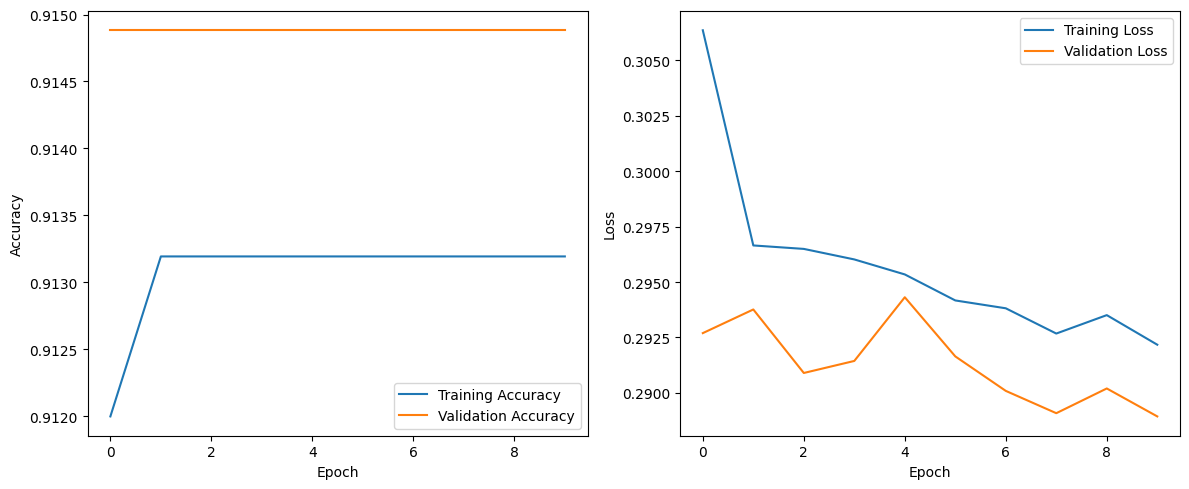

       loss  accuracy  val_loss  val_accuracy  Total Loss
0  0.306356  0.911999  0.292694      0.914882    0.599050
1  0.296649  0.913194  0.293761      0.914882    0.590410
2  0.296493  0.913194  0.290896      0.914882    0.587389
3  0.296019  0.913194  0.291439      0.914882    0.587458
4  0.295342  0.913194  0.294313      0.914882    0.589654
5  0.294168  0.913194  0.291644      0.914882    0.585813
6  0.293814  0.913194  0.290088      0.914882    0.583903
7  0.292675  0.913194  0.289082      0.914882    0.581757
8  0.293506  0.913194  0.290198      0.914882    0.583704
9  0.292172  0.913194  0.288937      0.914882    0.581109
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
            

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# Load data from pickle files
with open("x.pickle", "rb") as pickle_in:
    x = pickle.load(pickle_in)

with open("y.pickle", "rb") as pickle_in:
    y = pickle.load(pickle_in)

# Normalize the data by dividing by 255.0 
x = x / 255.0

# convolutional neural network model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x, y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stop])

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Create a table for total loss for each epoch
metrics_df = pd.DataFrame(history.history)
metrics_df['Total Loss'] = metrics_df['loss'] + metrics_df['val_loss']
print(metrics_df)

#Print CNN model summary
model.summary()
